The problem with the first example (linear regression) is that it does not account for the uncertainty in the model predictions. In geoscience applications, we often want to quantify the uncertainty in our predictions to better understand the range of possible outcomes and make more informed decisions.

In this second example, we will use Gaussian Process Regression (GPR) to model the uncertainty in our predictions. GPR is a non-parametric, Bayesian method that provides a full probability distribution for the target variable instead of a single point estimate. This allows us to quantify the uncertainty in our predictions.

Let's start by importing the necessary libraries and using the same synthetic data as in the first example:

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, Matern
from sklearn.model_selection import train_test_split

In [110]:
# Generate synthetic data (same as before)
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 1)
y = 2 * X + 1 + 0.2 * np.random.randn(n_samples, 1)

Now, let's split the data into training and testing sets:

In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, we'll create a Gaussian Process Regression model with a kernel function composed of a constant term and a Matern kernel.
The Matern kernel is a generalization of the RBF kernel that allows for non-integer values of the smoothing parameter.
The constant term is added to the kernel to account for the mean of the target variable.
Finally, we'll add a white noise term to the kernel to account for the noise in the data:

In [112]:
# Create a Gaussian Process Regression model
kernel = ConstantKernel() + Matern() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Fit the model to the training data
gpr.fit(X_train, y_train.ravel())

GaussianProcessRegressor(kernel=1**2 + Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1),
                         random_state=42)

Now, let's make predictions on the test data and calculate the mean squared error:

In [113]:
# Predict the target variable and its standard deviation on the test data
y_post = gpr.sample_y(X_test, n_samples=20, random_state=42)

Finally, let's visualize the results, including the uncertainty in the predictions:

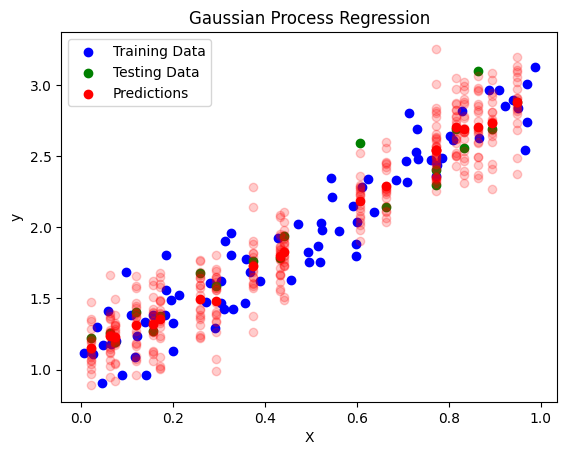

In [114]:
# Plot the results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.scatter(X_test, y_post.mean(axis=1), color='red', label='Predictions')
# plot the rest of the samples with a lower alpha value
plt.scatter(np.repeat(X_test, 20), y_post, color='red', alpha=0.2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

In this example, we used Gaussian Process Regression to model the uncertainty in our predictions. The resulting plot shows the model predictions along with a 95% confidence interval, allowing us to better understand the range of possible outcomes and the associated uncertainty.

Congratulations! You now know how to apply BASIL.